In [1]:
# !pip install -U pandas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 0. Download file
We download the ownership information from GitHub. The first dataframe (df) contains the provided data for task 1 (Alignment of Ownership), while the second dataframe (df2) is utilized for task 2 (Insider Activity), which consists of 5 sheets of CSV.

In [2]:
import requests
url="https://raw.githubusercontent.com/ParamaaS/DataSciWork/main/NTAssetAssignment/OwnershipData_v1.xlsx"
response = requests.get(url)
dest="OwnershipData_v1.xlsx"
with open(dest, 'wb') as file:
    file.write(response.content)
df=pd.read_excel(dest,sheet_name=2)
df.head()

,SP_COMPANY_NAME,ciqticker,SHARES_OWNED_INSIDERS,SP_NO_FLOAT_SHARES,SHARES_OWNED_INSTN_BANKS/INVEST_BANKS,SHARES_OWNED_INSTN_CHARITABLE_FOUNDATIONS,SHARES_OWNED_INSTN_CORP_PENSION_SPONSORS,SHARES_OWNED_INSTN_EDUCATIONAL/CULTURAL_ENDOWMENTS,SHARES_OWNED_INSTN_FAMILY_OFFICES/TRUSTS,SHARES_OWNED_INSTN_GOVT_PENSION_SPONSORS,...,SHARES_OWNED_INSTN_SOVEREIGN_WEALTH_FUNDS_LESS5PCT_STAKE,SHARES_OWNED_INSTN_VC/PE_FIRMS_LESS5PCT_STAKE,SHARES_OWNED_STRATEGIC_HEDGE_FUND_MGRS_MORE_EQUAL5SHARES_STAKE,SHARES_OWNED_STRATEGIC_VC/PE_FIRMS_MORE_EQUAL5SHARES_STAKE,SHARES_OWNED_STRATEGIC_SOVEREIGN_WEALTH_FUNDS_MORE_EQUAL5SHARES_STAKE,SHARES_OWNED_STRATEGIC_COMPANY_CONTROLLED_FOUNDATIONS,SHARES_OWNED_STRATEGIC_ESOP,SHARES_OWNED_STRATEGIC_STATE_OWNER,SHARES_OWNED_STRATEGIC_CORPORATIONS_PRIVATE,SHARES_OWNED_STRATEGIC_CORPORATIONS_PUBLIC
0,Minth Group Limited,SEHK:425,450244000,711749599,20408747,NaN,NaN,NaN,NaN,642901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fosun Tourism Group,SEHK:1992,26017916,148476835,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,987339132,81542487
2,Silverlake Axis Ltd.,SGX:5CP,1958070394,542363227,24785520,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11258000,NaN
3,Goldpac Group Limited,SEHK:3315,364605426,300398393,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152931181
4,Frasers Property (Thailand) Public Company Lim...,SET:FPT,20308200,352631709,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1946337510,NaN


Clean up data by
1.   Change NaN to 0 for ease of data manipulation
2.   Delete an invalid company information



In [3]:
df=df.fillna(0)
df=df[~(df['SP_COMPANY_NAME']=='#INVALID COMPANY ID')]
df

,SP_COMPANY_NAME,ciqticker,SHARES_OWNED_INSIDERS,SP_NO_FLOAT_SHARES,SHARES_OWNED_INSTN_BANKS/INVEST_BANKS,SHARES_OWNED_INSTN_CHARITABLE_FOUNDATIONS,SHARES_OWNED_INSTN_CORP_PENSION_SPONSORS,SHARES_OWNED_INSTN_EDUCATIONAL/CULTURAL_ENDOWMENTS,SHARES_OWNED_INSTN_FAMILY_OFFICES/TRUSTS,SHARES_OWNED_INSTN_GOVT_PENSION_SPONSORS,...,SHARES_OWNED_INSTN_SOVEREIGN_WEALTH_FUNDS_LESS5PCT_STAKE,SHARES_OWNED_INSTN_VC/PE_FIRMS_LESS5PCT_STAKE,SHARES_OWNED_STRATEGIC_HEDGE_FUND_MGRS_MORE_EQUAL5SHARES_STAKE,SHARES_OWNED_STRATEGIC_VC/PE_FIRMS_MORE_EQUAL5SHARES_STAKE,SHARES_OWNED_STRATEGIC_SOVEREIGN_WEALTH_FUNDS_MORE_EQUAL5SHARES_STAKE,SHARES_OWNED_STRATEGIC_COMPANY_CONTROLLED_FOUNDATIONS,SHARES_OWNED_STRATEGIC_ESOP,SHARES_OWNED_STRATEGIC_STATE_OWNER,SHARES_OWNED_STRATEGIC_CORPORATIONS_PRIVATE,SHARES_OWNED_STRATEGIC_CORPORATIONS_PUBLIC
0,Minth Group Limited,SEHK:425,450244000,711749599,20408747,0,0,0,0,642901,...,0,0,0,0,0,0,0,0,0,0
1,Fosun Tourism Group,SEHK:1992,26017916,148476835,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,987339132,81542487
2,Silverlake Axis Ltd.,SGX:5CP,1958070394,542363227,24785520,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11258000,0
3,Goldpac Group Limited,SEHK:3315,364605426,300398393,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,152931181
4,Frasers Property (Thailand) Public Company Lim...,SET:FPT,20308200,352631709,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1946337510,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Stella International Holdings Limited,SEHK:1836,88322794,532683613,0,0,0,0,0,0,...,0,14500,0,0,0,0,0,0,173508593,0
339,Accelya Solutions India Limited,NSEI:ACCELYA,117630,3585771,0,0,0,0,1091733,0,...,0,0,0,0,0,0,0,66265,11156595,0
340,Gia Lai Electricity Joint Stock Company,HOSE:GEG,1987902,89298955,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,212461106,37501438
341,Quess Corp Limited,NSEI:QUESS,23486369,54671895,620909,0,0,0,0,0,...,2097034,0,0,0,0,0,0,79772,69492184,0


In [4]:
# !wget https://raw.githubusercontent.com/ParamaaS/DataSciWork/main/NTAssetAssignment/DataPg1_v5.csv -O DataPg1.csv
# df=pd.read_csv('DataPg1.csv',index_col=0)

# 1. Alignment of Ownership Analysis


1.1 Since the data is stored in Python object format, we need to convert it to an integer (int64) type using the convert_to_int function below. Also, NaN values should be replaced with 0 to make calculations easier.



In [5]:
def convert_to_int(value):
    try:
      if value.replace(',', '').isdigit():
        return int(value.replace(',', ''))  # Remove comma and convert to int
    #   else:
    #     return 0
    except (ValueError, AttributeError):
        return value   # Handle errors or missing values by converting to zero

In [6]:
share_type_list=["SHARES_OWNED_INSIDERS","SP_NO_FLOAT_SHARES","SHARES_OWNED_INSTN_BANKS/INVEST_BANKS","SHARES_OWNED_INSTN_CHARITABLE_FOUNDATIONS","SHARES_OWNED_INSTN_CORP_PENSION_SPONSORS",	"SHARES_OWNED_INSTN_EDUCATIONAL/CULTURAL_ENDOWMENTS","SHARES_OWNED_INSTN_FAMILY_OFFICES/TRUSTS","SHARES_OWNED_INSTN_GOVT_PENSION_SPONSORS","SHARES_OWNED_INSTN_INSURANCE_COMPANIES","SHARES_OWNED_INSTN_INVEST_MGRS","SHARES_OWNED_INSTN_REIT","SHARES_OWNED_INSTN_UNCLASSIFIED","SHARES_OWNED_INSTN_UNION_PENSION_SPONSORS","SHARES_OWNED_INSTN_HEDGE_FUND_MGRS_LESS5PCT_STAKE","SHARES_OWNED_INSTN_SOVEREIGN_WEALTH_FUNDS_LESS5PCT_STAKE","SHARES_OWNED_INSTN_VC/PE_FIRMS_LESS5PCT_STAKE","SHARES_OWNED_STRATEGIC_HEDGE_FUND_MGRS_MORE_EQUAL5SHARES_STAKE","SHARES_OWNED_STRATEGIC_VC/PE_FIRMS_MORE_EQUAL5SHARES_STAKE","SHARES_OWNED_STRATEGIC_SOVEREIGN_WEALTH_FUNDS_MORE_EQUAL5SHARES_STAKE","SHARES_OWNED_STRATEGIC_COMPANY_CONTROLLED_FOUNDATIONS","SHARES_OWNED_STRATEGIC_ESOP","SHARES_OWNED_STRATEGIC_STATE_OWNER","SHARES_OWNED_STRATEGIC_CORPORATIONS_PRIVATE","SHARES_OWNED_STRATEGIC_CORPORATIONS_PUBLIC"]

In [7]:
for x in share_type_list:
  df[x] = df[x].apply(convert_to_int)
  # df[x] = df[x].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 342
Data columns (total 26 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   SP_COMPANY_NAME                                                        342 non-null    object
 1   ciqticker                                                              342 non-null    object
 2   SHARES_OWNED_INSIDERS                                                  342 non-null    int64 
 3   SP_NO_FLOAT_SHARES                                                     342 non-null    int64 
 4   SHARES_OWNED_INSTN_BANKS/INVEST_BANKS                                  342 non-null    int64 
 5   SHARES_OWNED_INSTN_CHARITABLE_FOUNDATIONS                              342 non-null    int64 
 6   SHARES_OWNED_INSTN_CORP_PENSION_SPONSORS                               342 non-null    int64 
 7  

In [8]:
df

,SP_COMPANY_NAME,ciqticker,SHARES_OWNED_INSIDERS,SP_NO_FLOAT_SHARES,SHARES_OWNED_INSTN_BANKS/INVEST_BANKS,SHARES_OWNED_INSTN_CHARITABLE_FOUNDATIONS,SHARES_OWNED_INSTN_CORP_PENSION_SPONSORS,SHARES_OWNED_INSTN_EDUCATIONAL/CULTURAL_ENDOWMENTS,SHARES_OWNED_INSTN_FAMILY_OFFICES/TRUSTS,SHARES_OWNED_INSTN_GOVT_PENSION_SPONSORS,...,SHARES_OWNED_INSTN_SOVEREIGN_WEALTH_FUNDS_LESS5PCT_STAKE,SHARES_OWNED_INSTN_VC/PE_FIRMS_LESS5PCT_STAKE,SHARES_OWNED_STRATEGIC_HEDGE_FUND_MGRS_MORE_EQUAL5SHARES_STAKE,SHARES_OWNED_STRATEGIC_VC/PE_FIRMS_MORE_EQUAL5SHARES_STAKE,SHARES_OWNED_STRATEGIC_SOVEREIGN_WEALTH_FUNDS_MORE_EQUAL5SHARES_STAKE,SHARES_OWNED_STRATEGIC_COMPANY_CONTROLLED_FOUNDATIONS,SHARES_OWNED_STRATEGIC_ESOP,SHARES_OWNED_STRATEGIC_STATE_OWNER,SHARES_OWNED_STRATEGIC_CORPORATIONS_PRIVATE,SHARES_OWNED_STRATEGIC_CORPORATIONS_PUBLIC
0,Minth Group Limited,SEHK:425,450244000,711749599,20408747,0,0,0,0,642901,...,0,0,0,0,0,0,0,0,0,0
1,Fosun Tourism Group,SEHK:1992,26017916,148476835,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,987339132,81542487
2,Silverlake Axis Ltd.,SGX:5CP,1958070394,542363227,24785520,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11258000,0
3,Goldpac Group Limited,SEHK:3315,364605426,300398393,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,152931181
4,Frasers Property (Thailand) Public Company Lim...,SET:FPT,20308200,352631709,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1946337510,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Stella International Holdings Limited,SEHK:1836,88322794,532683613,0,0,0,0,0,0,...,0,14500,0,0,0,0,0,0,173508593,0
339,Accelya Solutions India Limited,NSEI:ACCELYA,117630,3585771,0,0,0,0,1091733,0,...,0,0,0,0,0,0,0,66265,11156595,0
340,Gia Lai Electricity Joint Stock Company,HOSE:GEG,1987902,89298955,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,212461106,37501438
341,Quess Corp Limited,NSEI:QUESS,23486369,54671895,620909,0,0,0,0,0,...,2097034,0,0,0,0,0,0,79772,69492184,0


1.2 We find out the total number of company shares by adding up how many each shareholder has.

In [9]:
#Finding total value
df['total']=0
for x in share_type_list:
  df['total'] = df['total']+df[x]
  #Can use df[list].sum() too!
df[['SP_COMPANY_NAME','SHARES_OWNED_INSIDERS','total']]

,SP_COMPANY_NAME,SHARES_OWNED_INSIDERS,total
0,Minth Group Limited,450244000,1578986628
1,Fosun Tourism Group,26017916,1260721807
2,Silverlake Axis Ltd.,1958070394,2568790352
3,Goldpac Group Limited,364605426,826702816
4,Frasers Property (Thailand) Public Company Lim...,20308200,2338326361
...,...,...,...
338,Stella International Holdings Limited,88322794,860838324
339,Accelya Solutions India Limited,117630,16123648
340,Gia Lai Electricity Joint Stock Company,1987902,341614558
341,Quess Corp Limited,23486369,184792646


1.3 To figure out the insider ownership percentage, we divide the number of shares owned by insiders by the total number of shares issued.

In [10]:
# df['ownership_percentage']=0.0
df['ownership_percentage']=df["SHARES_OWNED_INSIDERS"]/df['total']*100

1.4 Then, we make these percentages easier to compare by putting them on a scale from 1 to 10 using the score_convertor function.

`Score=1+[(input-min)*9/(max-min)]`


In [11]:
def score_convertor(column):
    """converts values in the range [min_val,max_val] to values in the range [1,10]"""
    max_val=column.max(skipna=True)
    min_val=column.min(skipna=True)
    column-=min_val
    column*=9
    column/=(max_val-min_val)
    column+=1
    # return float(1 +  (float(column-min_val)*float(9)/float(max_val-min_val)))
    return column

In [12]:
df["ownership_score"]=df['ownership_percentage']
df['ownership_score']=score_convertor(df['ownership_score'])
df.set_index('ciqticker', inplace=True)

1.5 After that, we calculate the ownership score and add it to the last column of the dataframe. We set up `dftask1` with just the ticker, company name, and ownership score for later merging.



In [13]:
df=df.sort_values(by=['ownership_score'],ascending=False)
# dftask1=df[["SP_COMPANY_NAME","ownership_percentage","ownership_score"]]
dftask1=df[["SP_COMPANY_NAME","ownership_score"]]
dftask1

,SP_COMPANY_NAME,ownership_score
ciqticker,,
PSE:UPSON,Upson International Corp.,10.000000
SGX:5CP,Silverlake Axis Ltd.,9.766181
SEHK:6993,Blue Moon Group Holdings Limited,9.652670
IDX:CMRY,PT Cisarua Mountain Dairy Tbk,9.416568
NSEI:PDSL,PDS Limited,9.413538
...,...,...
TPEX:5530,Lungyen Life Service Corporation,1.000000
HNX:IDC,IDICO Corporation - JSC,1.000000
IDX:INTP,PT Indocement Tunggal Prakarsa Tbk,1.000000


Showing that the distribution of ownership alignment score follows same trend as insider holding percentage

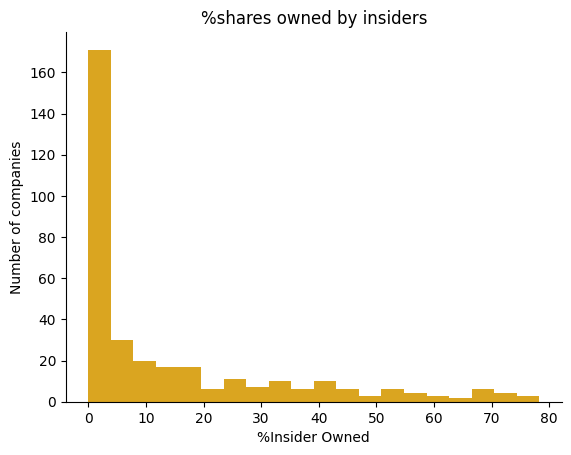

In [14]:
df['ownership_percentage'].plot(kind='hist', bins=20, title='%shares owned by insiders',color='goldenrod')
plt.xlabel('%Insider Owned')
plt.ylabel('Number of companies')
plt.gca().spines[['top', 'right',]].set_visible(False)

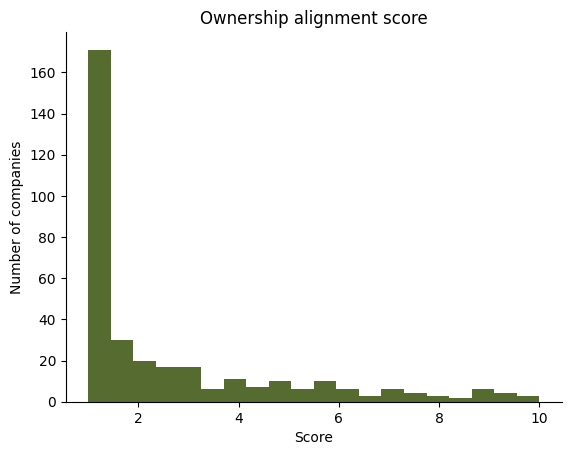

In [15]:
df['ownership_score'].plot(kind='hist', bins=20, title='Ownership alignment score',color='darkolivegreen')
plt.xlabel('Score')
plt.ylabel('Number of companies')
plt.gca().spines[['top', 'right',]].set_visible(False)

Remark: there is one company that don't have any information and it is removed.

# 2. Insider Activity Analysis




2.1 The ownership information is imported into dataframe 2 (df2).

In [16]:
df2=pd.read_excel(dest,sheet_name=[3,4,5,6,7])

2.2 Clean up data by changing NaN to 0 for ease of calculation.

2.3 Insider holdings for each company across multiple time periods are aggregated, treating all insiders collectively as if they exchange shares among themselves, while still maintaining a constant total share count.

In [17]:
def Total_share_calculation(df,x):
  df=df.T
  df[f'period Q{abs(8-x)}']=df.iloc[1:,10:].sum(axis=1)
  # print(df['total'])
  # df=df.T
  return df

In [18]:
for x in range(3,8):
  df2[x].fillna(0)
  df2[x]=Total_share_calculation(df2[x],x)
# df2[3].iloc[10:,:3]

In [19]:
df2[7].tail() #Q1 -> 12/2022

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,period Q1
SEHK:1836,Jeh-Chung Chiang,Li-Ming Chen,Yi-Min Chiang,Lo-Jen Chi,Peter Bolliger,Fu Keung Chan,Ming-Cheng Chao,NaN,NaN,NaN,...,28769227,2753149,1783500,150000,50000,0,NaN,NaN,NaN,8.113329e+07
NSEI:ACCELYA,Rohini Nilekani,Preeti Parag Shah,Parag Anop Shah,Geeta Chetan Shah,Uttamkumar Bhati,Ninad Gajanan Umranikar,NaN,NaN,NaN,NaN,...,40628,33981,503,2,1,NaN,NaN,NaN,NaN,1.751150e+05
HOSE:GEG,Dang Huynh-Uc My,Ha Thai Nguyen,Van Thuy Nguyen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,719777,337080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.063516e+07
NSEI:QUESS,Ajit Abraham Isaac,Ashish Dhawan,Guruprasad Srinivasan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5861223,105533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.288637e+07
SET:PRINC,Sathita Vittayakorn,Satit Viddayakorn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,858495429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.583987e+09


2.4	Holding position data from five distinct time periods are integrated into a unified dataframe (df3) to enhance clarity and visualization.

In [20]:
df3=pd.DataFrame()
for x in range(7,2,-1):
  df3=pd.concat([df3,df2[x].iloc[:,[20]]],axis=1)
df3 = df3.drop('Field/ CIQ Ticker', axis=0)
df3

,period Q1,period Q2,period Q3,period Q4,period Q5
SEHK:425,4.500720e+08,4.500720e+08,4.500920e+08,4.501940e+08,4.501940e+08
SEHK:1992,2.553945e+07,2.553945e+07,2.553945e+07,2.587275e+07,2.601792e+07
SGX:5CP,1.952552e+09,1.957952e+09,1.957952e+09,1.957750e+09,1.957750e+09
SEHK:3315,3.646054e+08,3.646054e+08,3.646054e+08,3.646054e+08,3.646054e+08
SET:FPT,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.030820e+07
...,...,...,...,...,...
SEHK:1836,8.113329e+07,8.348329e+07,8.665329e+07,8.665329e+07,8.742279e+07
NSEI:ACCELYA,1.751150e+05,1.751150e+05,1.176300e+05,1.176300e+05,1.176300e+05
HOSE:GEG,3.063516e+07,3.063516e+07,1.987902e+06,1.987902e+06,1.987902e+06
NSEI:QUESS,2.288637e+07,2.348637e+07,2.348637e+07,2.348637e+07,2.348637e+07


2.5	The insider_activity function facilitates the examination of the holding position value for a specific company.

In [21]:
# Check value of each stock
def insider_activity(name):
  print(df3.T[name])
insider_activity("SET:SAPPE")

period Q1    221524688.0
period Q2    221524688.0
period Q3    221524688.0
period Q4    221524688.0
period Q5    221524688.0
Name: SET:SAPPE, dtype: float64


2.6	To recognize trends in insider activity, the slope of the provided numerical data serves as a reliable indicator, obtained through the "polyfit" function, which determines the optimal fit line for the given dataset.

In [22]:
x=[1,2,3,4,5]
df3.iloc[1,:]
slopes=[]
# for c in range(5):
for c in range(len(df3)):
  m,cc=np.polyfit(x,df3.iloc[c,:].T,1)
  # plt.plot(x,df3.iloc[c,:].T)
  # plt.show
  slopes.append(m)
df4=df3
df4['slope']=slopes

2.7	Subsequently, the slope is normalized to a scale ranging from 1 to 10 using the score_convertor function.

In [23]:
df4=df4.sort_values(by=['slope'],ascending=False)
df4['insider_activity_score']=df4['slope']
df4['insider_activity_score']=score_convertor(df4['insider_activity_score'])
df4

,period Q1,period Q2,period Q3,period Q4,period Q5,slope,insider_activity_score
SGX:8AZ,1.340000e+06,2.460000e+06,5.451576e+08,5.451576e+08,5.451576e+08,1.630333e+08,10.000000
IDX:HEAL,7.917274e+09,7.927056e+09,7.898163e+09,8.220337e+09,8.220337e+09,8.994061e+07,8.945874
SET:MINT,2.241207e+09,2.239345e+09,2.239587e+09,2.358576e+09,2.358576e+09,3.539680e+07,8.159255
IDX:CSAP,2.585196e+08,2.585196e+08,2.585196e+08,3.285414e+08,3.295414e+08,2.120656e+07,7.954606
NSEI:PAYTM,5.860845e+07,5.860845e+07,5.860845e+07,1.247435e+08,1.247435e+08,1.984053e+07,7.934906
...,...,...,...,...,...,...,...
IDX:MTDL,2.951216e+09,2.951216e+09,2.951216e+09,2.953748e+09,2.676758e+09,-5.463846e+07,6.860786
PSE:UPSON,3.102606e+09,2.500000e+09,2.445568e+09,2.445568e+09,2.445580e+09,-1.368484e+08,5.675173
IDX:BUKA,3.228634e+09,2.456048e+09,2.456048e+09,2.456048e+09,2.456048e+09,-1.545171e+08,5.420359
IDX:ULTJ,5.632527e+09,5.632527e+09,5.638610e+09,5.638610e+09,4.066384e+09,-3.126204e+08,3.140228


In [24]:
# df4.to_csv('Insider_score_Paramaa_v1.csv', index=True)

In [25]:
df4 = df4.rename_axis('ciqticker')

2.8	The insider score is then assigned to dftask2, preparing it for integration with dftask1 into the final dataframe.

In [26]:
dftask2=df4[["insider_activity_score"]]
dftask2

,insider_activity_score
ciqticker,
SGX:8AZ,10.000000
IDX:HEAL,8.945874
SET:MINT,8.159255
IDX:CSAP,7.954606
NSEI:PAYTM,7.934906
...,...
IDX:MTDL,6.860786
PSE:UPSON,5.675173
IDX:BUKA,5.420359


# 3. Aggregation of Ownership Factors


1.   The final scores are aggregated using the ***median*** method.
2.   It is important to regard the score as ordinal data due to the inconsistent intervals between each score, albeit retaining an ordered structure.
3. Given that the rating or score represents ordinal data, the suitable statistical measures include mode and median.
4. The selection of the median over the mode is justified as it offers a more robust measure of central tendency.
5. Then, we also apply normalization to the final score column making it ranged from 1 to 10 using the score_convertor function.


In [27]:
dftask3 = pd.merge(dftask1, dftask2, on='ciqticker')
dftask3["final_score"]=dftask3.median(axis=1)
dftask3['final_score']=score_convertor(dftask3['final_score'])
dftask3=dftask3.sort_values(by=['final_score'],ascending=False)
dftask3

<ipython-input-27-9838d2a97b3d>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dftask3["final_score"]=dftask3.median(axis=1)


,SP_COMPANY_NAME,ownership_score,insider_activity_score,final_score
ciqticker,,,,
SGX:8AZ,Aztech Global Ltd.,8.915041,10.000000,10.000000
SGX:5CP,Silverlake Axis Ltd.,9.766181,7.663472,9.188949
SEHK:6993,Blue Moon Group Holdings Limited,9.652670,7.648810,9.118964
NSEI:PDSL,PDS Limited,9.413538,7.645357,8.986508
IDX:HEAL,PT Medikaloka Hermina Tbk,8.045342,8.945874,8.949554
...,...,...,...,...
IDX:CLEO,PT Sariguna Primatirta Tbk,1.119961,7.231476,4.232066
IDX:SMRA,PT Summarecon Agung Tbk,1.166952,7.122967,4.198476
IDX:ULTJ,PT Ultrajaya Milk Industry & Trading Company Tbk,4.788986,3.140228,4.001524


In [28]:
dftask3.to_csv('Ownership_score_Paramaa_v1.csv', index=True)

# 4. Addtional factors

4.1 **Float:**  The number of shares available for trading by the public. Low float stocks can be more volatile due to limited supply, while high float stocks may have more stable prices

In [34]:
df5=pd.DataFrame()
df5['float']=df["SP_NO_FLOAT_SHARES"]/df['total']*100
df5['float_score']=df5['float']
df5['float_score']=score_convertor(df5['float_score'])
df5=df5.sort_values(by=['float_score'],ascending=False)
df5

,float,float_score
ciqticker,,
HOSE:BID,98.939409,10.000000
HOSE:HCM,94.634147,9.608373
HOSE:DGW,90.213327,9.206234
HOSE:AGG,89.993628,9.186249
HOSE:MBB,89.448687,9.136679
...,...,...
HOSE:BSI,0.000000,1.000000
HOSE:VCB,0.000000,1.000000
TPEX:5289,0.000000,1.000000


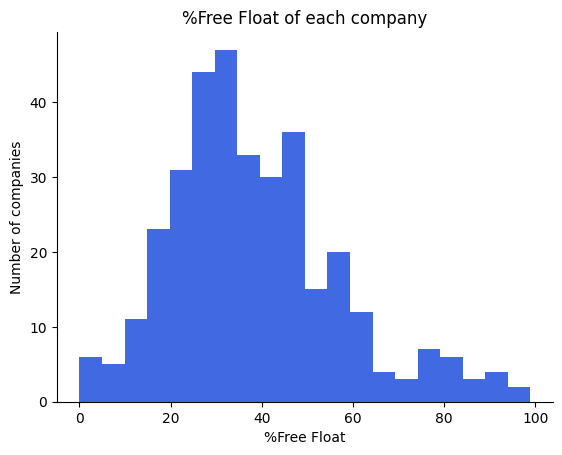

In [30]:
df5['float'].plot(kind='hist', bins=20, title='%Free Float of each company',color='royalblue')
plt.xlabel('%Free Float')
plt.ylabel('Number of companies')
plt.gca().spines[['top', 'right',]].set_visible(False)

4.2	Ownership of institutional investors: The percentage of a company's shares held by institutional investors, such as mutual funds, pension funds, and hedge funds. High institutional ownership can indicate confidence from professional investors and may influence stock price movements.
The instutions includes
*   Family offices/trusts
*   Investment managers
*   Government Pensions
*   etc.





In [36]:
inst_list=["SHARES_OWNED_INSTN_BANKS/INVEST_BANKS","SHARES_OWNED_INSTN_CHARITABLE_FOUNDATIONS","SHARES_OWNED_INSTN_CORP_PENSION_SPONSORS",	"SHARES_OWNED_INSTN_EDUCATIONAL/CULTURAL_ENDOWMENTS","SHARES_OWNED_INSTN_FAMILY_OFFICES/TRUSTS","SHARES_OWNED_INSTN_GOVT_PENSION_SPONSORS","SHARES_OWNED_INSTN_INSURANCE_COMPANIES","SHARES_OWNED_INSTN_INVEST_MGRS","SHARES_OWNED_INSTN_REIT","SHARES_OWNED_INSTN_UNCLASSIFIED","SHARES_OWNED_INSTN_UNION_PENSION_SPONSORS","SHARES_OWNED_INSTN_HEDGE_FUND_MGRS_LESS5PCT_STAKE","SHARES_OWNED_INSTN_SOVEREIGN_WEALTH_FUNDS_LESS5PCT_STAKE","SHARES_OWNED_INSTN_VC/PE_FIRMS_LESS5PCT_STAKE"]
df5['inst_ownership']=df[inst_list].sum(axis=1)/df['total']*100
df5['inst_score']=df5['inst_ownership']
df5['inst_score']=score_convertor(df5['inst_score'])
df5=df5.sort_values(by=['inst_score'],ascending=False)
df5[['inst_ownership','inst_score']]

,inst_ownership,inst_score
ciqticker,,
HOSE:VRE,100.0,10.0
TPEX:5289,100.0,10.0
TWSE:6504,100.0,10.0
HOSE:BSI,100.0,10.0
HOSE:VCB,100.0,10.0
...,...,...
PSE:UPSON,0.0,1.0
PSE:FCG,0.0,1.0
IDX:ADCP,0.0,1.0


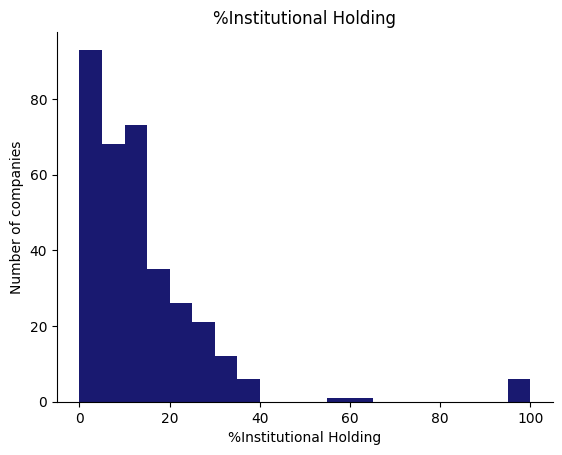

In [32]:
df5['inst_ownership'].plot(kind='hist', bins=20, title='%Institutional Holding',color='midnightblue')
plt.xlabel('%Institutional Holding')
plt.ylabel('Number of companies')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [33]:
dftask4 = pd.merge(dftask3, df5, on='ciqticker')
dftask4=dftask4[["SP_COMPANY_NAME","ownership_score","insider_activity_score","float_score","inst_score"]]
dftask4["final_score"]=dftask4.median(axis=1)
dftask4['final_score']=score_convertor(dftask4['final_score'])
dftask4=dftask4.sort_values(by=['final_score'],ascending=False)
dftask4

<ipython-input-33-6f6e77886645>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dftask4["final_score"]=dftask4.median(axis=1)


,SP_COMPANY_NAME,ownership_score,insider_activity_score,float_score,inst_score,final_score
ciqticker,,,,,,
SGX:8AZ,Aztech Global Ltd.,8.915041,10.000000,3.504305,1.228908,10.000000
SET:SNNP,Srinanaporn Marketing Public Company Limited,7.216953,7.722741,4.942569,1.233949,9.757830
SET:PSP,P.S.P. Specialties Public Company Limited,6.009204,7.648770,6.134324,1.000000,9.742923
HOSE:TVS,Thien Viet Securities Joint Stock Company,5.809179,7.675252,6.292539,1.000000,9.703954
KOSDAQ:A129890,"Abko Co., Ltd.",5.415023,7.640440,6.568008,1.035913,9.593331
...,...,...,...,...,...,...
IDX:BRIS,PT Bank Syariah Indonesia Tbk,1.008027,7.689366,1.879098,1.168091,1.264639
PSE:FB,"San Miguel Food and Beverage, Inc.",1.001176,7.648779,1.988881,1.005004,1.214957
IDX:PANI,PT Pantai Indah Kapuk Dua Tbk,1.000000,7.648770,1.982232,1.003735,1.207577
